# An Attempt to Predict invites through CRS for Canadian Immigration Programs

* Thanks to <a href="https://www.kaggle.com/code/umerkk12/canadian-immigration-analysis-directly-from-web">UMERKK12 </a></h5> for EDA work got to learn very well <h5>

In [1]:
# Run after taining the model
print(f'MAE : {mean_absolute_error(y_test,predictions)}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test,predictions))}')


NameError: name 'mean_absolute_error' is not defined

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import random
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Canadian Immigration Dataset.csv', index_col=0)

In [5]:
df.head(3)

,Draw Number,Date,Immigration program,Invitations issued,CRS score of lowest-ranked candidate invited,Date (hidden),Programs covered,Month,Year,month_year,Date Full
0,172,1/7/2021,Canadian Experience Class,4750,461,7/1/2021,Canadian Experience Class,1,2021,1/1/2021,7-Jan-21
1,171,1/6/2021,Provincial Nominee Program,250,813,6/1/2021,Provincial Nominee Program,1,2021,1/1/2021,6-Jan-21
2,170,12/23/2020,No program specified,5000,468,12/23/2020,Canadian Experience Class Federal Skilled Wor...,12,2020,12/1/2020,23-Dec-20


In [6]:
df['Immigration program'].unique()

array(['Canadian Experience Class', 'Provincial Nominee Program',
       'No program specified', 'Federal Skilled Trades'], dtype=object)

* By observing the data we interpret there is some immigration program with "No program specified" which can be treated a null values   but as it will be the essential feature for our model we just picked random program from  offered programs.

In [7]:
df['Programs covered'].unique()

array(['Canadian Experience Class', 'Provincial Nominee Program',
       'Canadian Experience Class  Federal Skilled Worker Program  Federal Skilled Worker Program  Provincial Nominee Program',
       'Federal Skilled Trades'], dtype=object)

In [8]:
#df['Programs covered'] = df['Programs covered'].apply(lambda x: x.split('  '))

In [9]:
'''d = []
for i in df['Programs covered'].values:
    if len(i) < 1:
        pass
    else:
        random.shuffle(i)
    d.append(i)
df['Programs covered'] = d'''

"d = []\nfor i in df['Programs covered'].values:\n    if len(i) < 1:\n        pass\n    else:\n        random.shuffle(i)\n    d.append(i)\ndf['Programs covered'] = d"

In [10]:
'''for i in df['Immigration program']:
    if i == 'No program specified':
        for j in df['Programs covered']:
            if len(j) > 1:
                pass
            else:
                i.replace('No program specified',j[0] )
pp = []
for i in df["Programs covered"].values:
    pp.append(i[0])'''

'for i in df[\'Immigration program\']:\n    if i == \'No program specified\':\n        for j in df[\'Programs covered\']:\n            if len(j) > 1:\n                pass\n            else:\n                i.replace(\'No program specified\',j[0] )\npp = []\nfor i in df["Programs covered"].values:\n    pp.append(i[0])'

In [11]:
#df['Immigration program'] = pp

In [12]:
#as we have got immigration program for each invite we can drop the program covered and unneccesary date  columns
df.drop(['Programs covered', 'Date (hidden)','month_year','Date Full','Date'], axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 6 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Draw Number                                   173 non-null    int64 
 1   Immigration program                           173 non-null    object
 2   Invitations issued                            173 non-null    int64 
 3   CRS score of lowest-ranked candidate invited  173 non-null    int64 
 4   Month                                         173 non-null    int64 
 5   Year                                          173 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 6 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Draw Number                                   173 non-null    int64 
 1   Immigration program                           173 non-null    object
 2   Invitations issued                            173 non-null    int64 
 3   CRS score of lowest-ranked candidate invited  173 non-null    int64 
 4   Month                                         173 non-null    int64 
 5   Year                                          173 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


* Categories
    * 'Canadian Experience Class':0, 
    * 'Federal Skilled Trades':1,
    * 'Federal Skilled Worker Program':2, 
    * 'Provincial Nominee Program':3

In [15]:
df.rename(columns={'Draw Number':'Dno','Immigration program':'IP','Invitations issued':'Invites',
           'CRS score of lowest-ranked candidate invited':'Lowest_CRS'}, inplace=True)

In [16]:
## Regression Problem Considering Lowest_CRS as Dependent Variable

In [17]:
df.isnull().sum()

Dno           0
IP            0
Invites       0
Lowest_CRS    0
Month         0
Year          0
dtype: int64

In [18]:
df.head(2)

,Dno,IP,Invites,Lowest_CRS,Month,Year
0,172,Canadian Experience Class,4750,461,1,2021
1,171,Provincial Nominee Program,250,813,1,2021


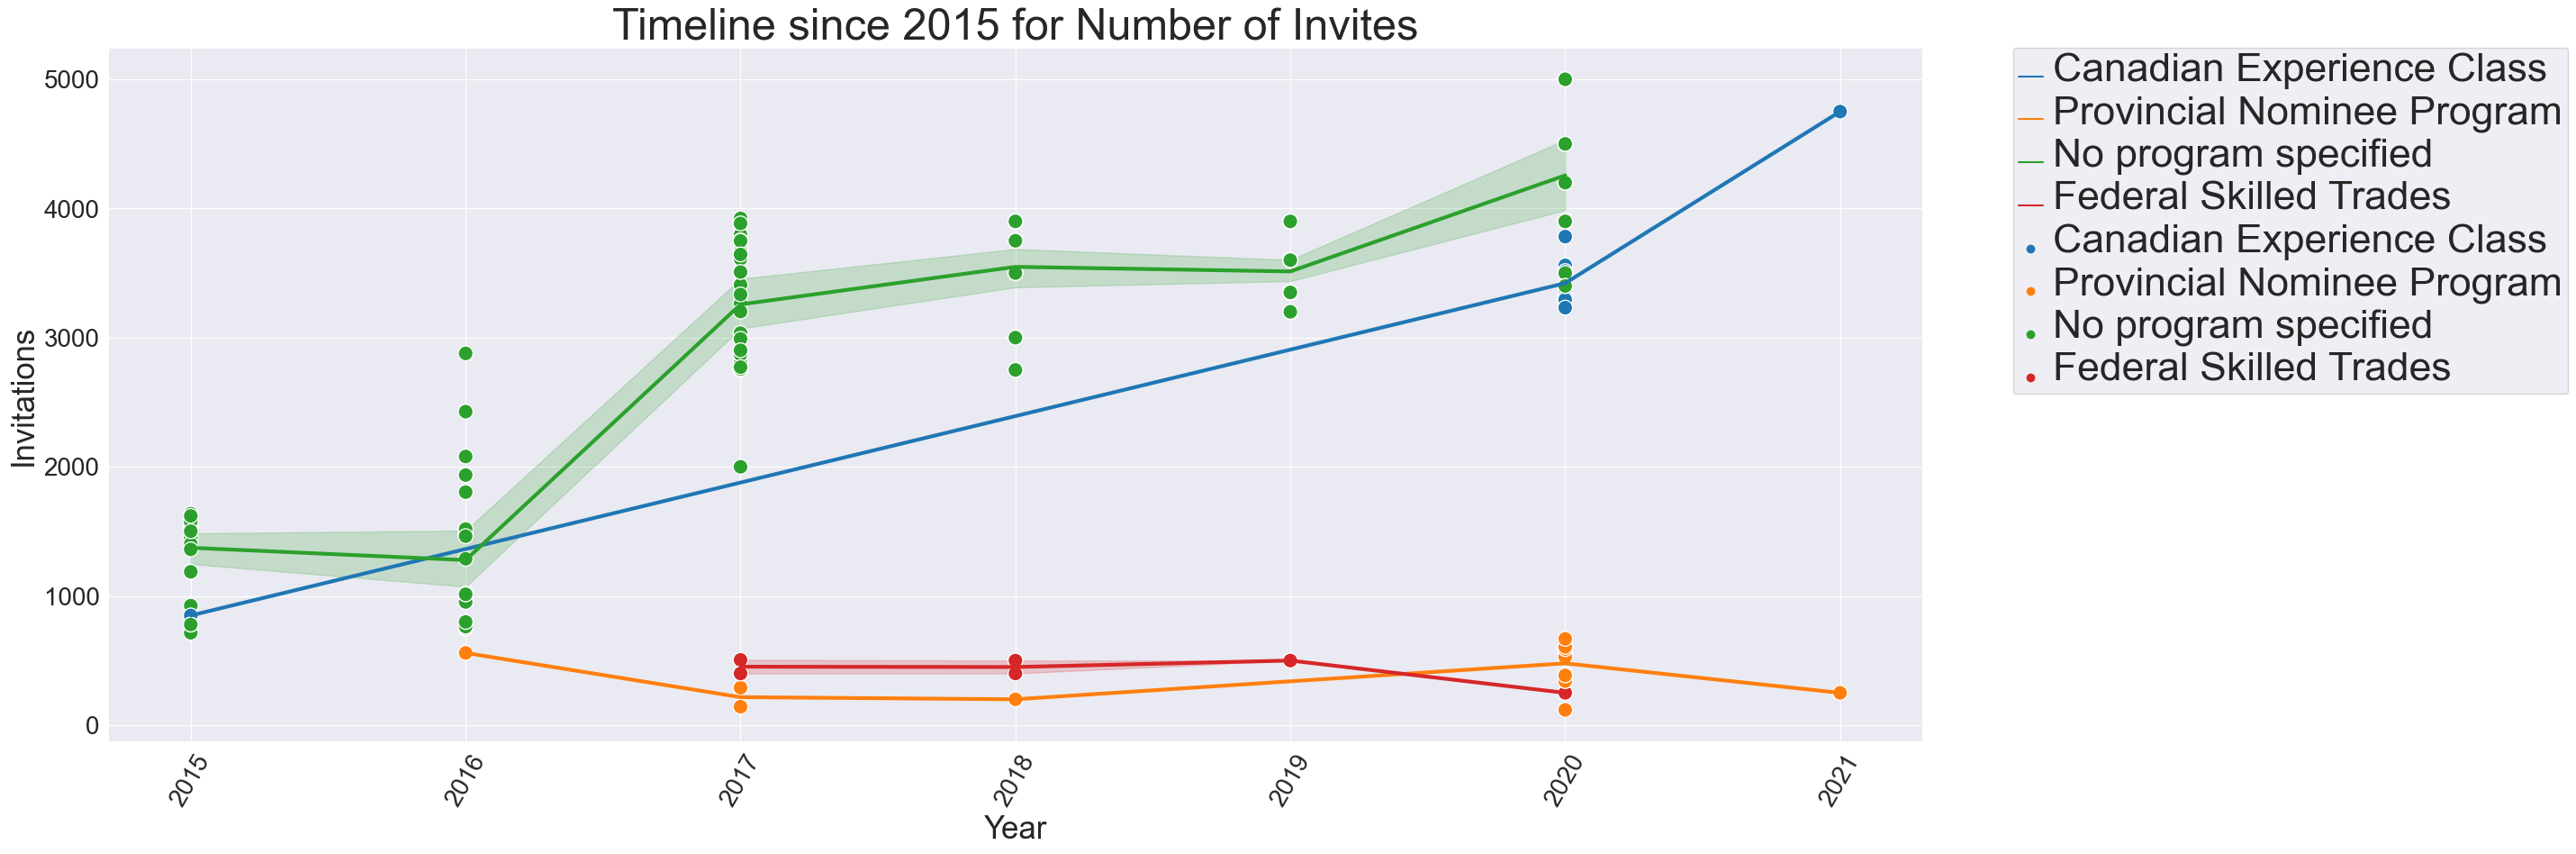

In [19]:
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
s = sns.lineplot(x='Year', y= 'Invites', lw=3,data=df,hue='IP')
sns.scatterplot(x='Year', y= 'Invites', data=df, hue='IP', s=140)

g =plt.xticks(rotation=60)
s.set_xlabel('Year', fontsize=25)
s.set_ylabel('Invitations', fontsize=25)
s.set_title('Timeline since 2015 for Number of Invites', fontsize=35)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(s.get_legend().get_texts(), fontsize='32') # for legend text
plt.setp(s.get_legend().get_title(), fontsize='32') # for legend 
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)

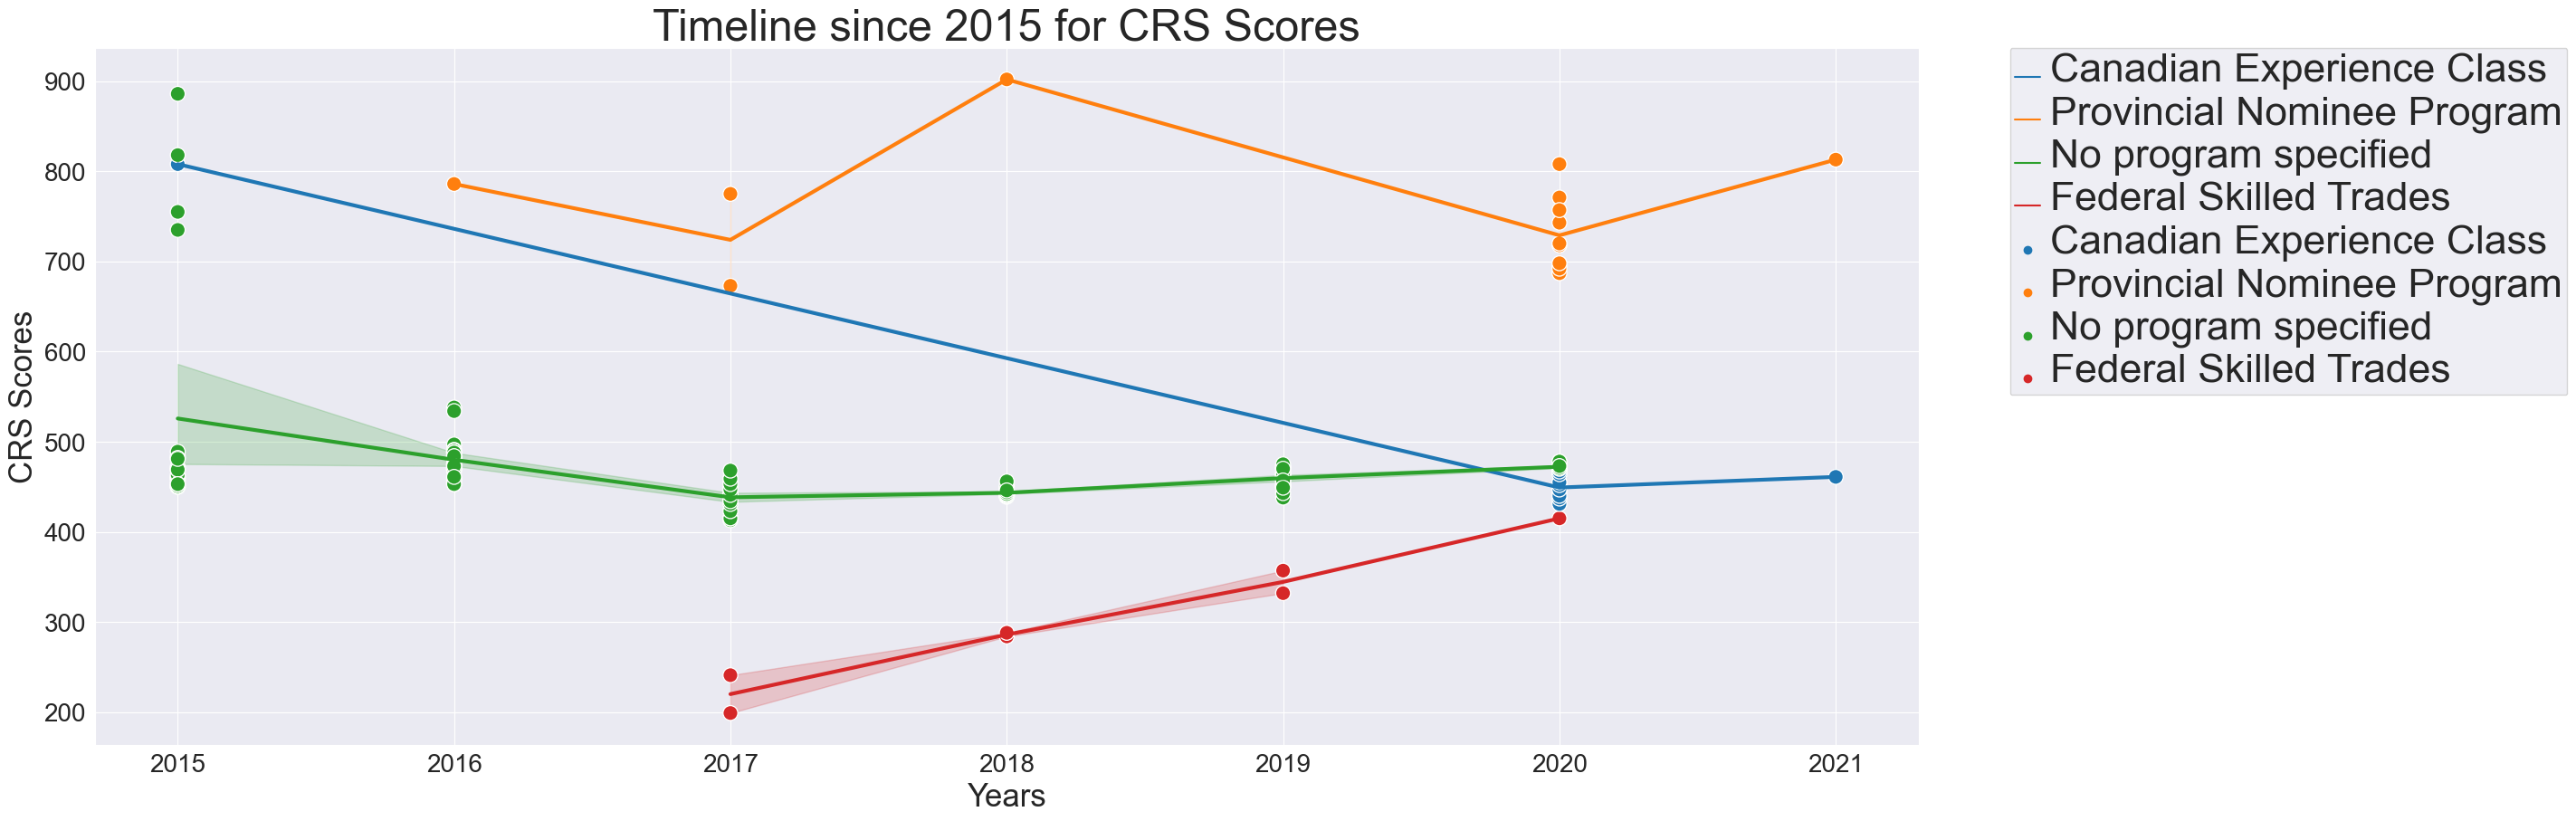

In [20]:
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
s = sns.lineplot(x='Year', y= 'Lowest_CRS',lw=3, data=df, hue='IP')
sns.scatterplot(x='Year', y= 'Lowest_CRS', data=df, hue='IP', s=140)
g =plt.xticks(rotation=0)
s.set_xlabel('Years', fontsize=25)
s.set_ylabel('CRS Scores', fontsize=25)
s.set_title('Timeline since 2015 for CRS Scores', fontsize=35)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(s.get_legend().get_texts(), fontsize='32') # for legend text
plt.setp(s.get_legend().get_title(), fontsize='32') # for legend 
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)

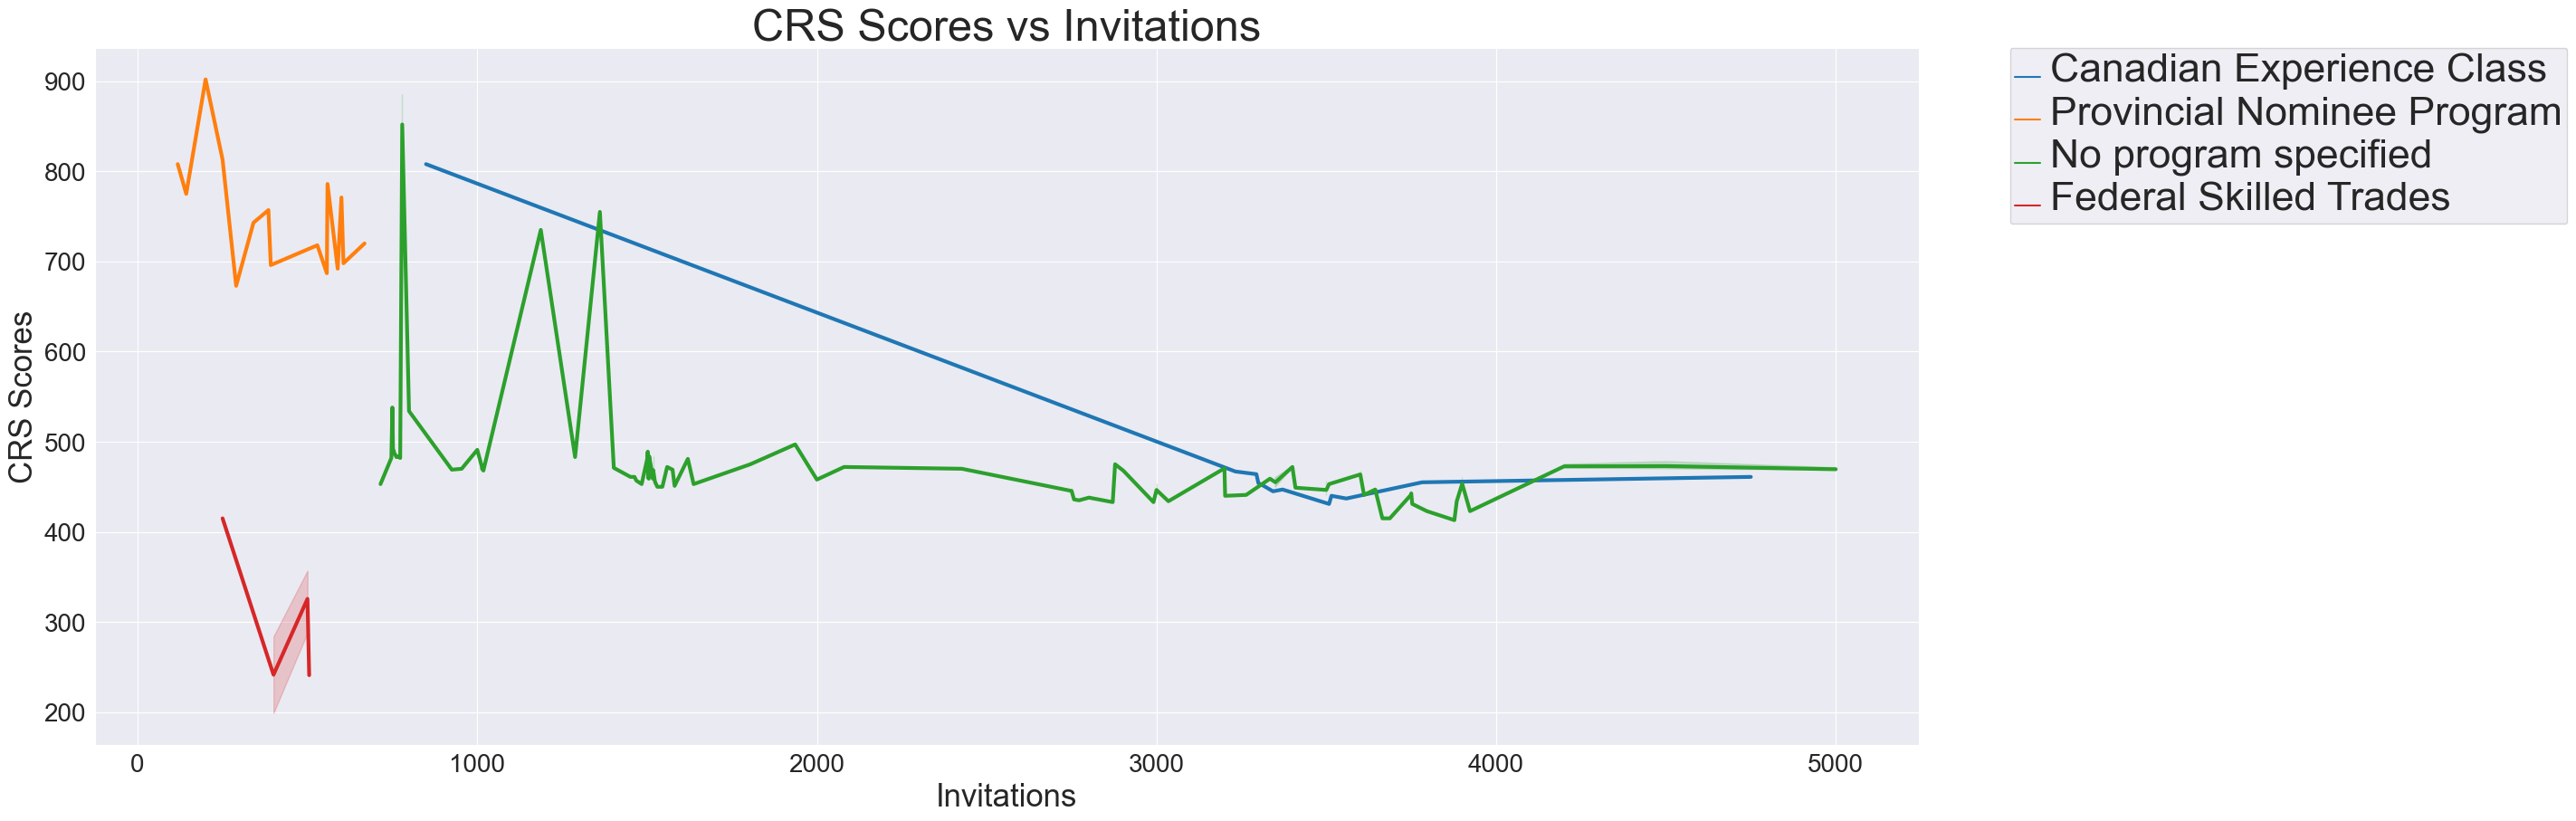

In [21]:
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
s = sns.lineplot(x='Invites', y= 'Lowest_CRS',lw=3, data=df, hue='IP')
g =plt.xticks(rotation=0)
s.set_xlabel('Invitations', fontsize=25)
s.set_ylabel('CRS Scores', fontsize=25)
s.set_title('CRS Scores vs Invitations', fontsize=35)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(s.get_legend().get_texts(), fontsize='32') # for legend text
plt.setp(s.get_legend().get_title(), fontsize='32') # for legend 
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)

In [22]:
df['IP'].unique()

array(['Canadian Experience Class', 'Provincial Nominee Program',
       'No program specified', 'Federal Skilled Trades'], dtype=object)

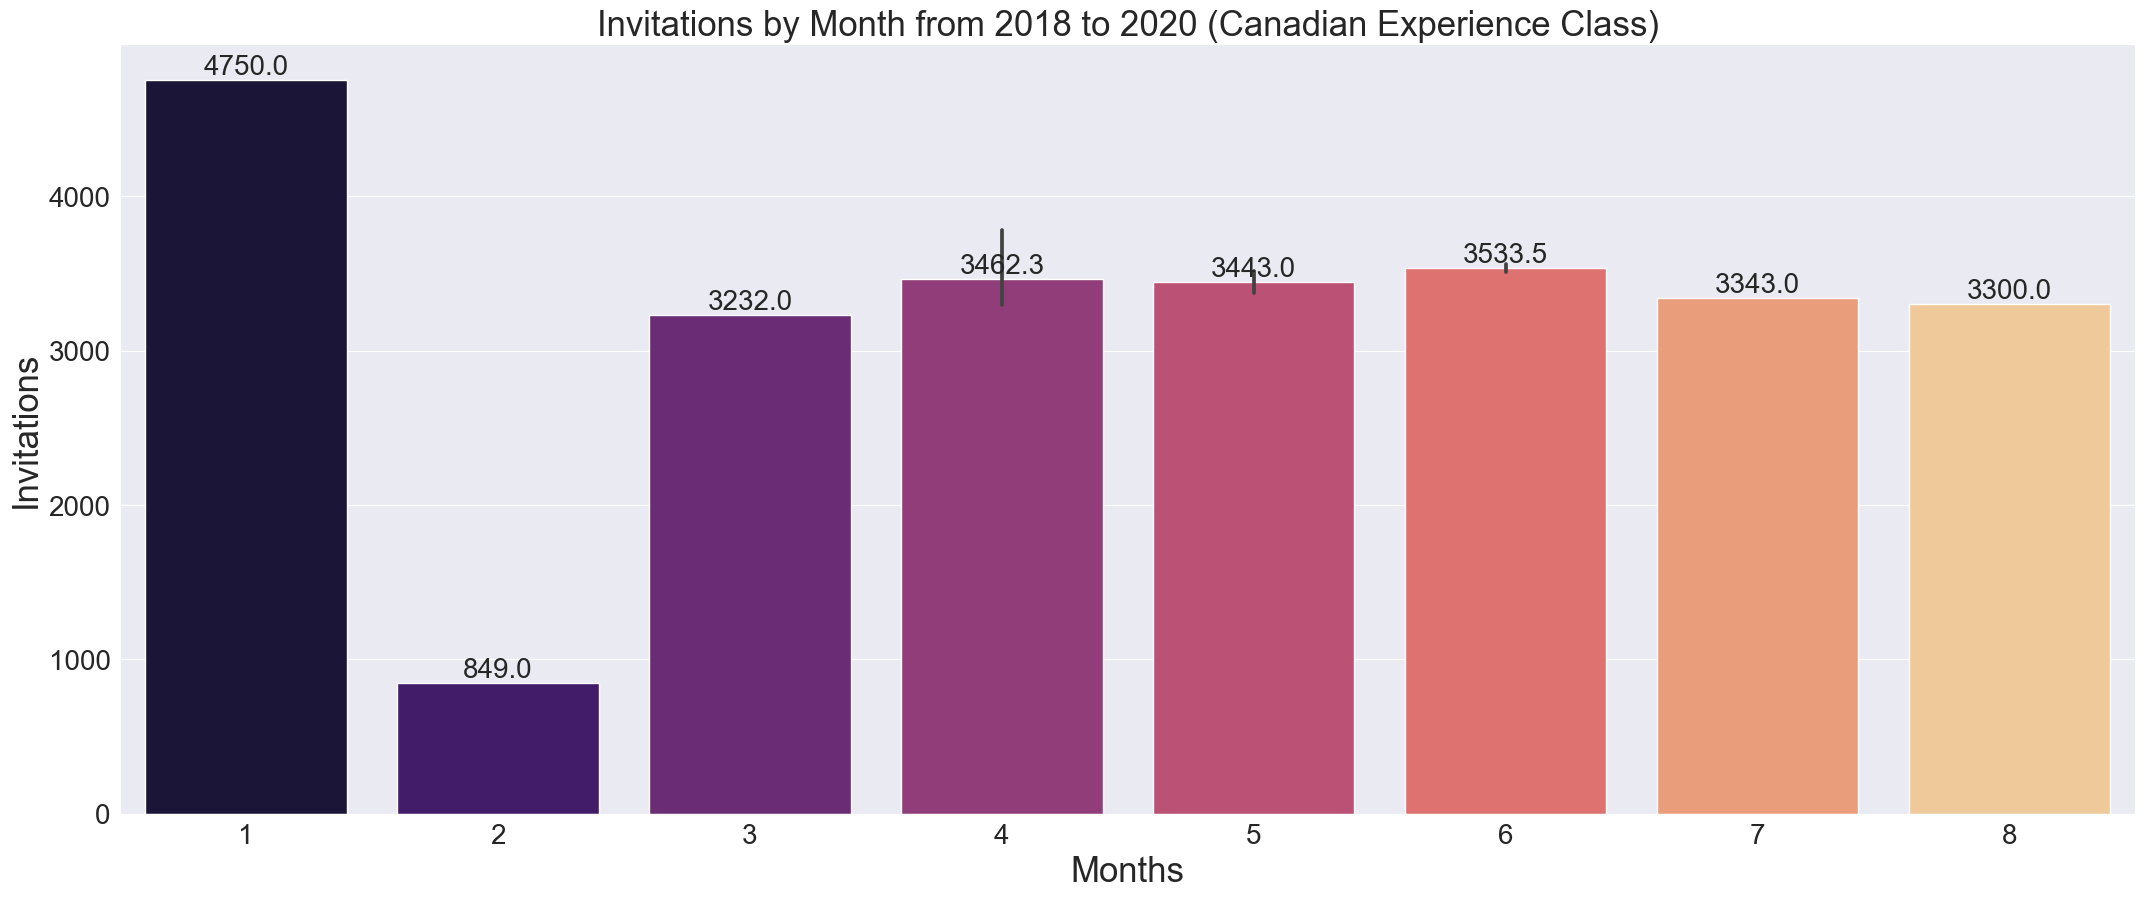

In [23]:
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
f = sns.barplot(x='Month', y='Invites', data=df[df['IP']=='Canadian Experience Class'], palette='magma')
for p in f.patches:
    f.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,9), size=20,
                   textcoords = 'offset points')
g =plt.xticks(rotation=0)
f.set_xlabel('Months', fontsize=25)
f.set_ylabel('Invitations', fontsize=25)
f.set_title('Invitations by Month from 2018 to 2020 (Canadian Experience Class)', fontsize=25)
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)

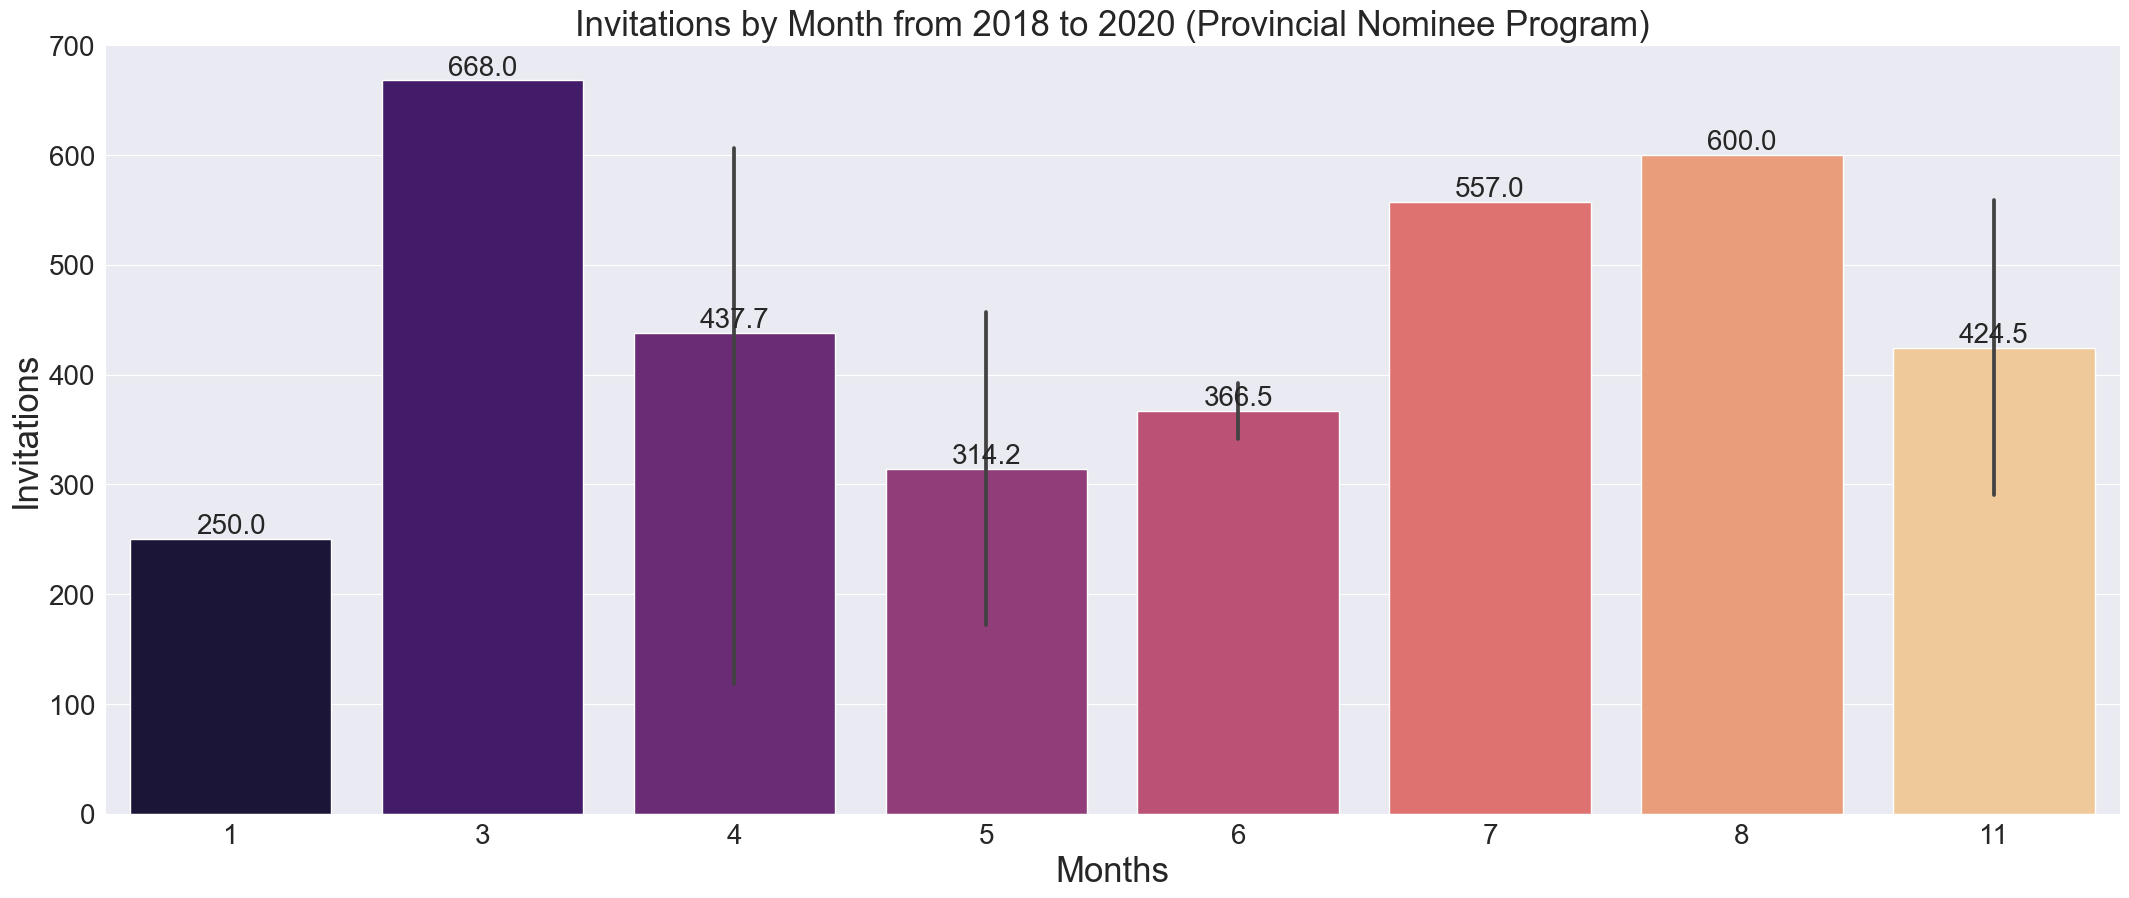

In [24]:
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
f = sns.barplot(x='Month', y='Invites', data=df[df['IP']=='Provincial Nominee Program'], palette='magma')
for p in f.patches:
    f.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,9), size=20,
                   textcoords = 'offset points')
g =plt.xticks(rotation=0)
f.set_xlabel('Months', fontsize=25)
f.set_ylabel('Invitations', fontsize=25)
f.set_title('Invitations by Month from 2018 to 2020 (Provincial Nominee Program)', fontsize=25)
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)

In [25]:
df.head()

,Dno,IP,Invites,Lowest_CRS,Month,Year
0,172,Canadian Experience Class,4750,461,1,2021
1,171,Provincial Nominee Program,250,813,1,2021
2,170,No program specified,5000,468,12,2020
3,169,No program specified,5000,469,12,2020
4,168,No program specified,5000,469,11,2020


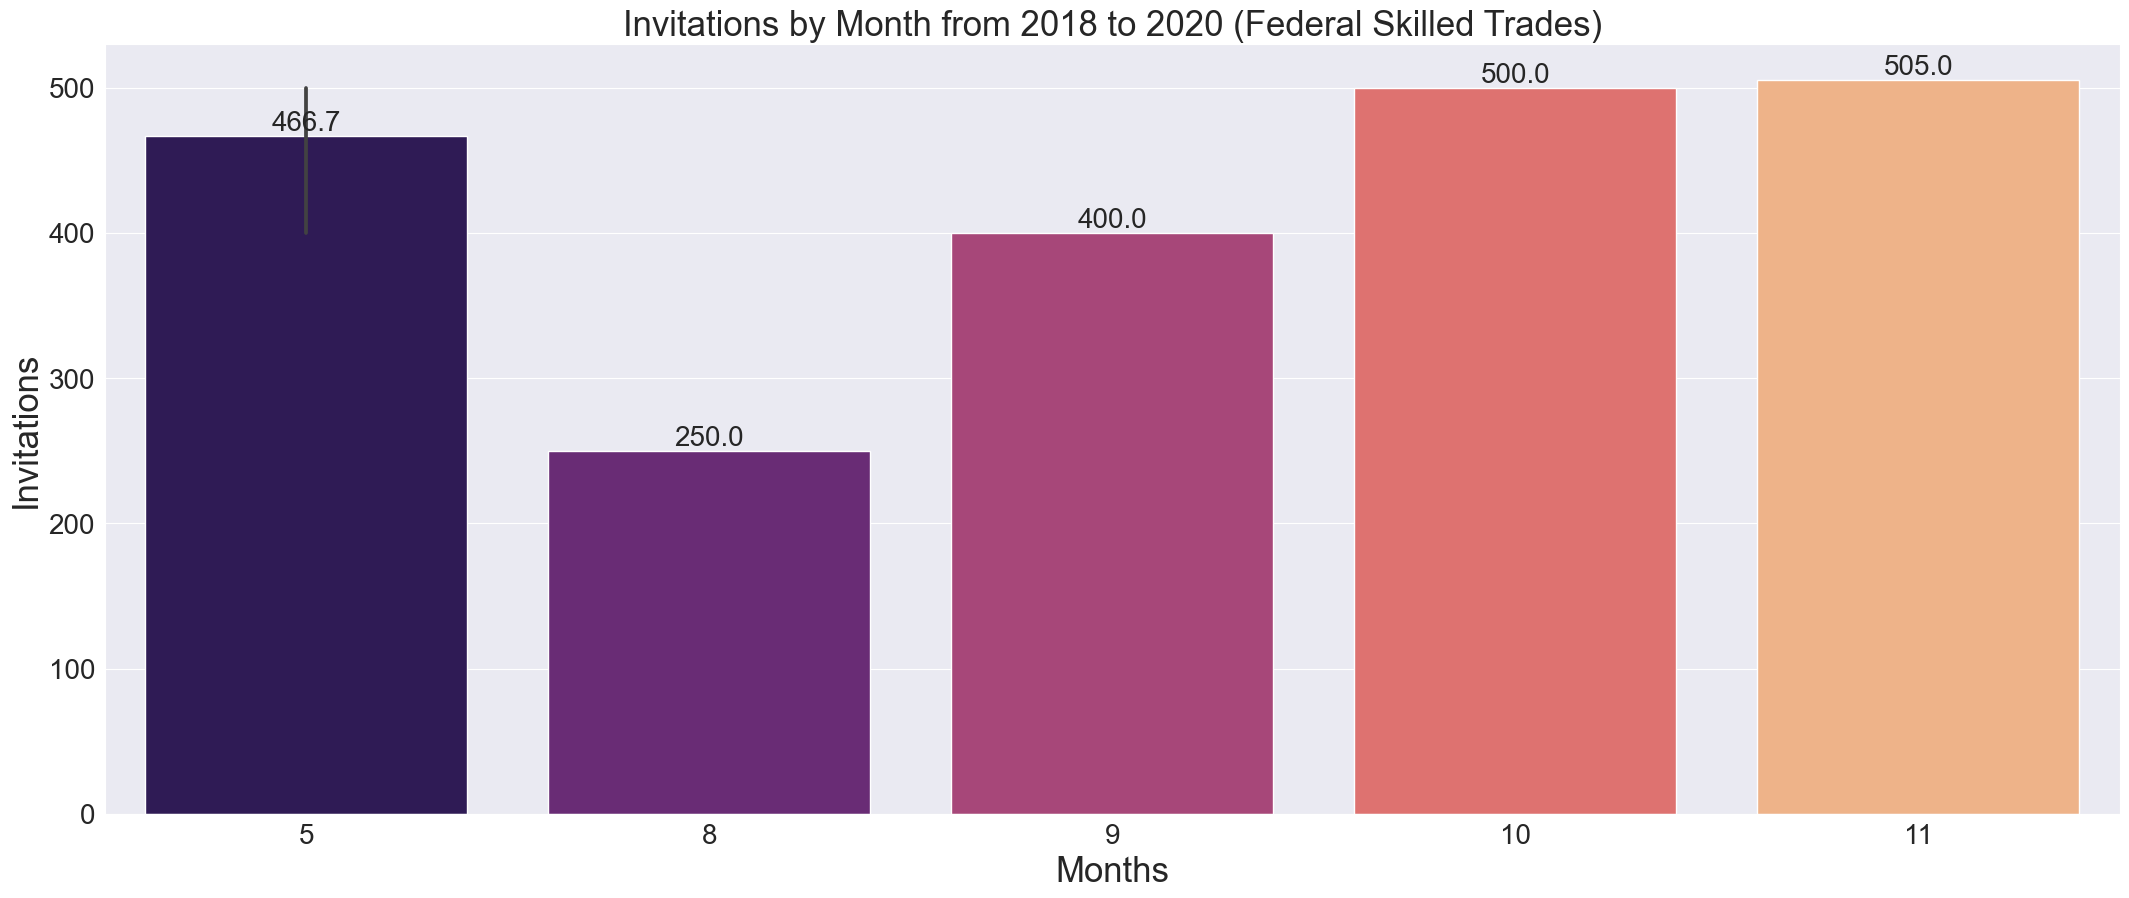

In [26]:
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
f = sns.barplot(x='Month', y='Invites', data=df[df['IP']=='Federal Skilled Trades'], palette='magma')
for p in f.patches:
    f.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,9), size=20,
                   textcoords = 'offset points')
g =plt.xticks(rotation=0)
f.set_xlabel('Months', fontsize=25)
f.set_ylabel('Invitations', fontsize=25)
f.set_title('Invitations by Month from 2018 to 2020 (Federal Skilled Trades)', fontsize=25)
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)

In [27]:
df_r = df.groupby('Month').mean().reset_index()
df_r.head()

,Month,Dno,Invites,Lowest_CRS,Year
0,1,83.375000,2713.875000,504.687500,2018.062500
1,2,60.333333,2534.083333,537.000000,2017.166667
2,3,76.615385,2570.538462,478.307692,2017.692308
3,4,89.411765,2373.705882,499.117647,2018.058824
4,5,89.315789,1975.052632,509.631579,2017.947368


(430.0, 500.0)

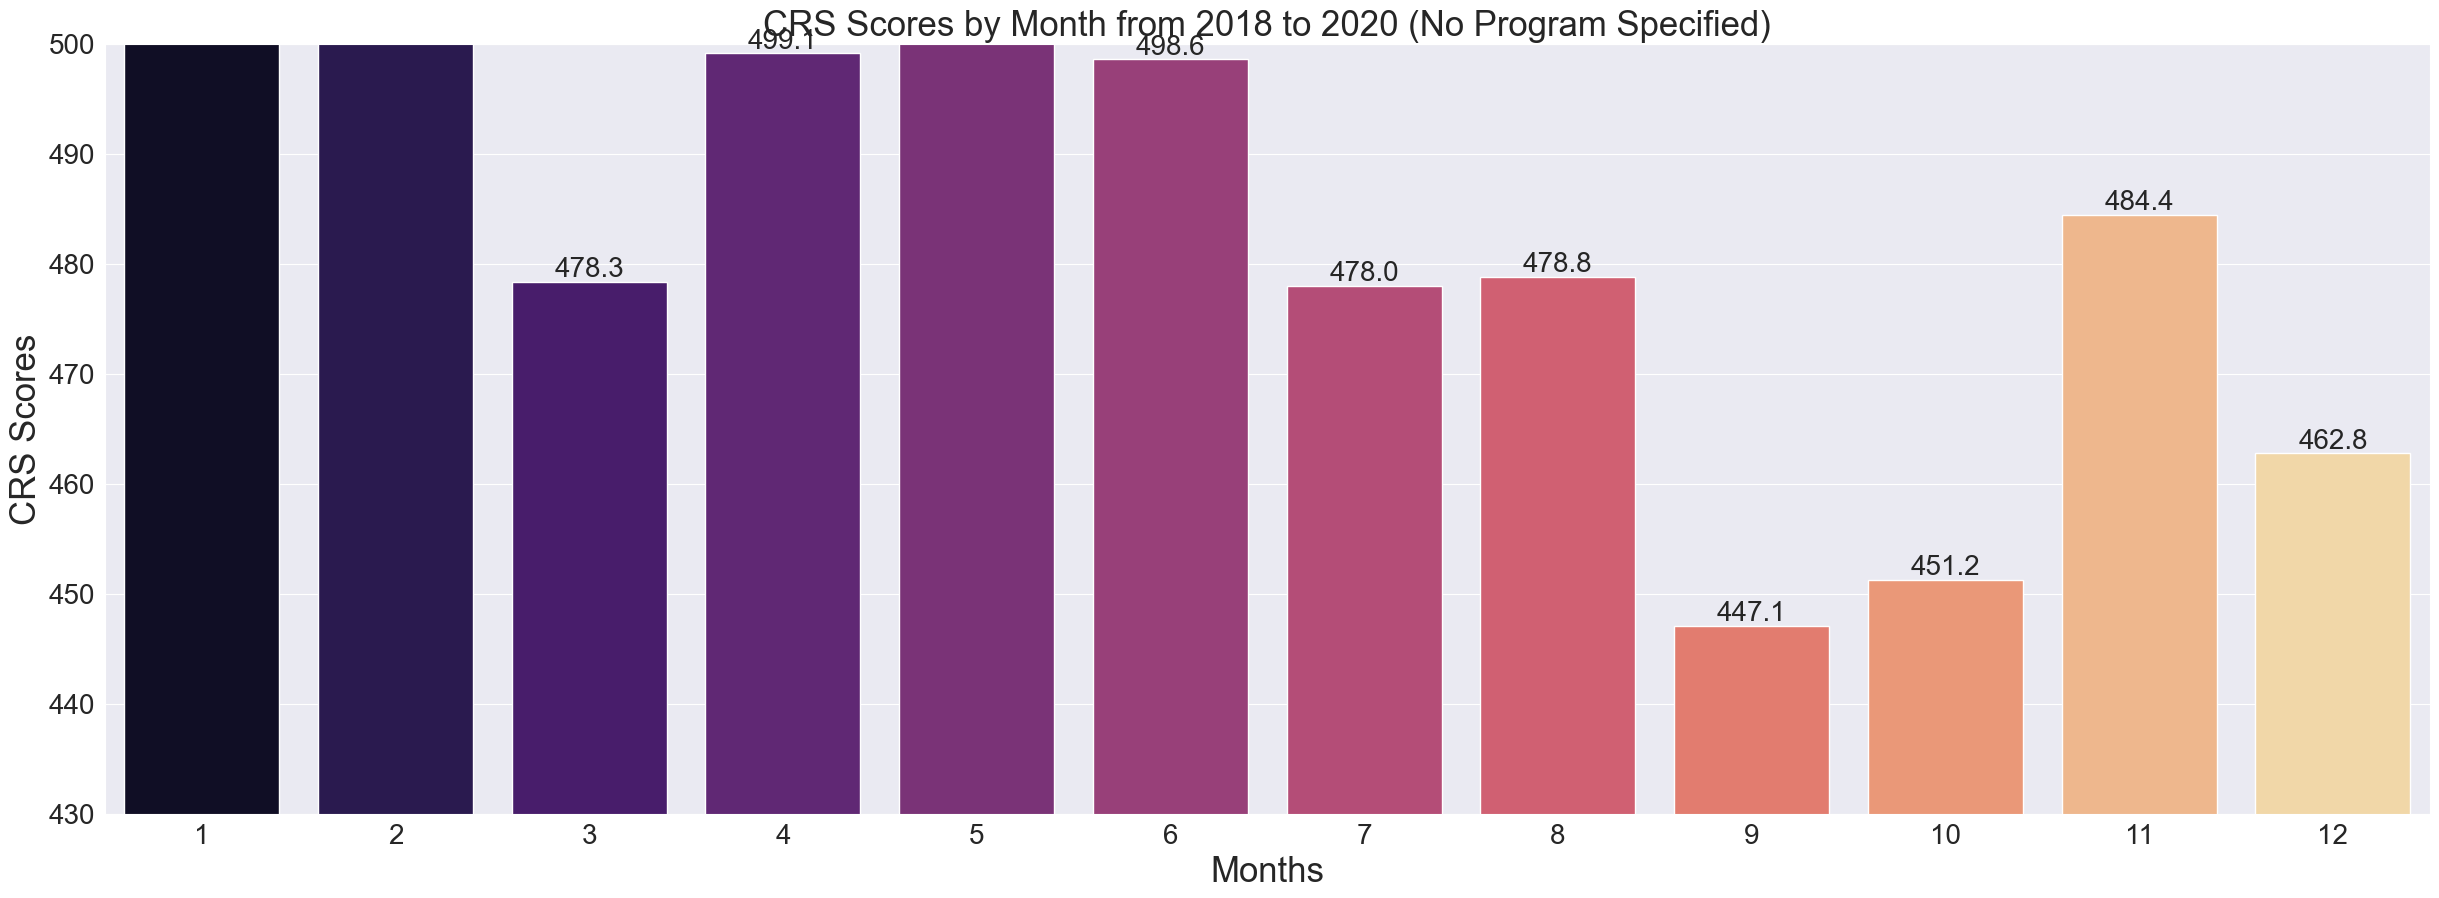

In [28]:
plt.figure(figsize=(30,10))
sns.set_style('darkgrid')
f = sns.barplot(x='Month', y='Lowest_CRS', data=df_r, palette='magma')
for p in f.patches:
    f.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,9), size=20,
                   textcoords = 'offset points')

g =plt.xticks(rotation=0)
f.set_xlabel('Months', fontsize=25)
f.set_ylabel('CRS Scores', fontsize=25)
f.set_title('CRS Scores by Month from 2018 to 2020 (No Program Specified)', fontsize=25)
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)
plt.ylim(430,500)

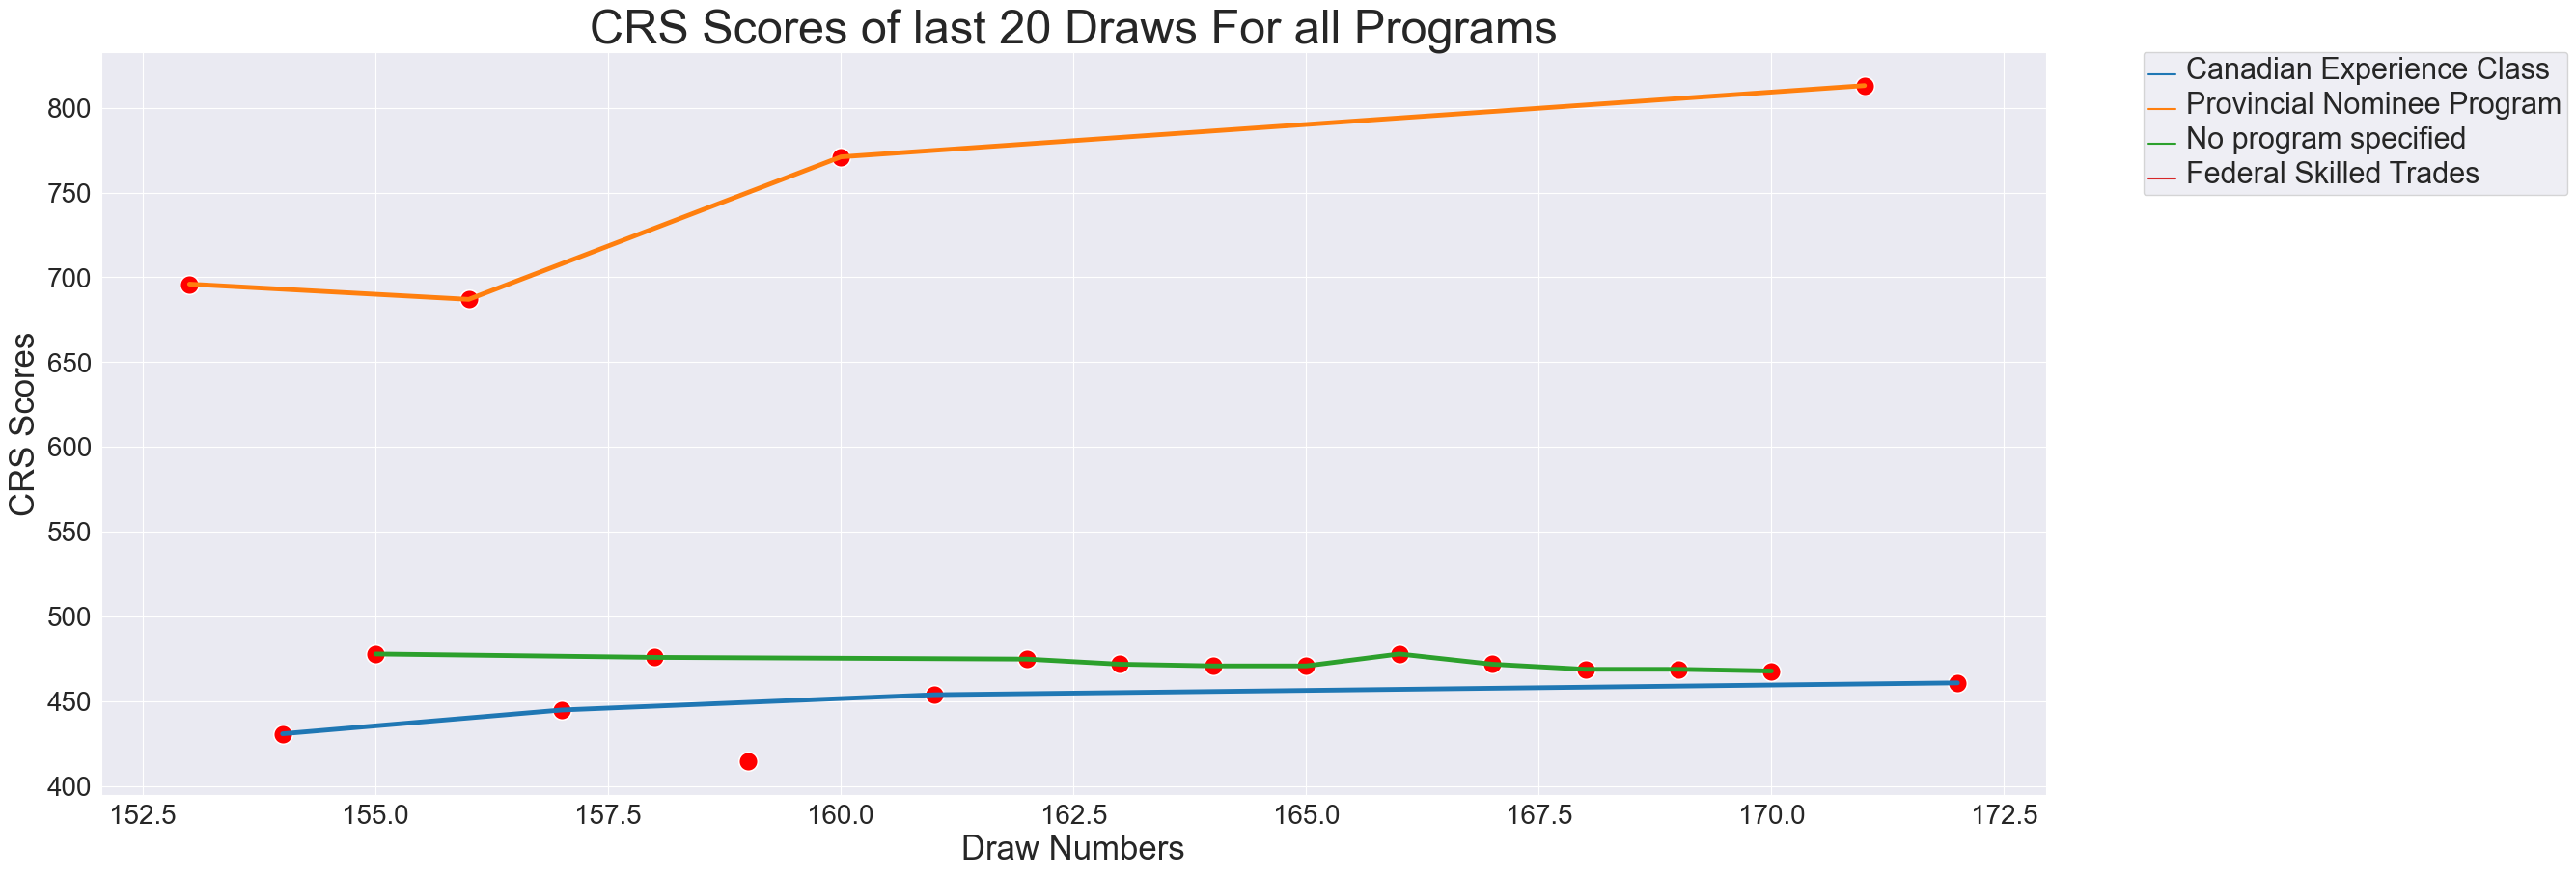

In [29]:
last_20_draws = df.iloc[:20]
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
s = sns.lineplot(x='Dno', y= 'Lowest_CRS', data=last_20_draws, color='skyblue', lw=3.5, hue='IP')
s = sns.scatterplot(x='Dno', y= 'Lowest_CRS', data=last_20_draws, color='red', s=200)
g =plt.xticks(rotation=0)
s.set_xlabel('Draw Numbers', fontsize=25)
s.set_ylabel('CRS Scores', fontsize=25)
s.set_title('CRS Scores of last 20 Draws For all Programs', fontsize=35)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(s.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(s.get_legend().get_title(), fontsize='22') # for legend 
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)

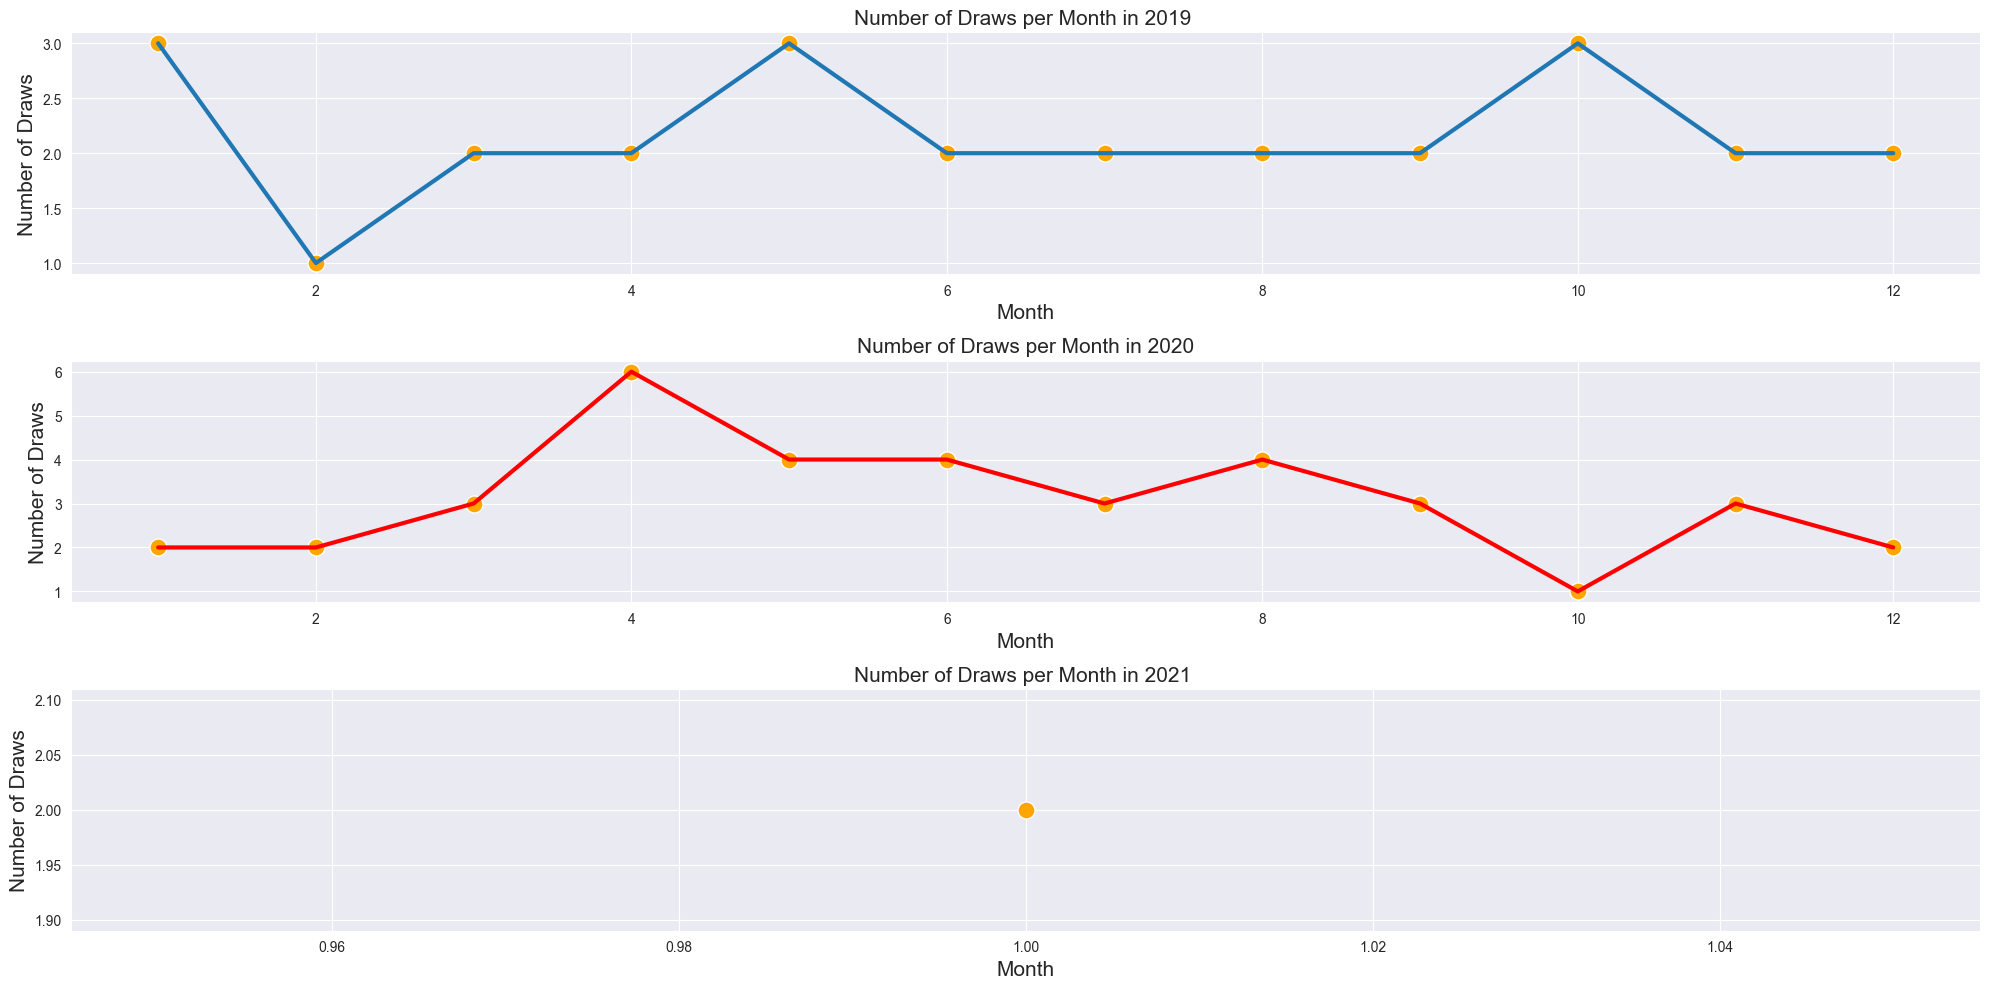

In [30]:
df_19 = df[df['Year'].isin([2019])].groupby('Month').count().reset_index()
df_20 = df[df['Year'].isin([2020])].groupby('Month').count().reset_index()
df_21 = df[df['Year'].isin([2021])].groupby('Month').count().reset_index()

fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(20,10))
s = sns.lineplot(x='Month', y= 'Dno', data=df_19, ax=ax[0], lw=3)
s = sns.scatterplot(x='Month', y= 'Dno', data=df_19, ax=ax[0], color='orange', s=150)
s.set_xlabel('Month', fontsize=15)
s.set_ylabel('Number of Draws', fontsize=15)
s.set_title('Number of Draws per Month in 2019 ', fontsize=15)

w = sns.lineplot(x='Month', y= 'Dno', data=df_20, ax=ax[1], color='red', lw=3)
w = sns.scatterplot(x='Month', y= 'Dno', data=df_20, ax=ax[1], color='orange', s=150)
w.set_xlabel('Month', fontsize=15)
w.set_ylabel('Number of Draws', fontsize=15)
w.set_title('Number of Draws per Month in 2020', fontsize=15)

t = sns.lineplot(x='Month', y= 'Dno', data=df_21, ax=ax[2], color='green', lw=3)
t = sns.scatterplot(x='Month', y= 'Dno', data=df_21, ax=ax[2], color='orange', s=150)
t.set_xlabel('Month', fontsize=15)
t.set_ylabel('Number of Draws', fontsize=15)
t.set_title('Number of Draws per Month in 2021 ', fontsize=15)

plt.tight_layout()

In [31]:
df.head(2)

,Dno,IP,Invites,Lowest_CRS,Month,Year
0,172,Canadian Experience Class,4750,461,1,2021
1,171,Provincial Nominee Program,250,813,1,2021


<AxesSubplot:xlabel='Lowest_CRS', ylabel='Density'>

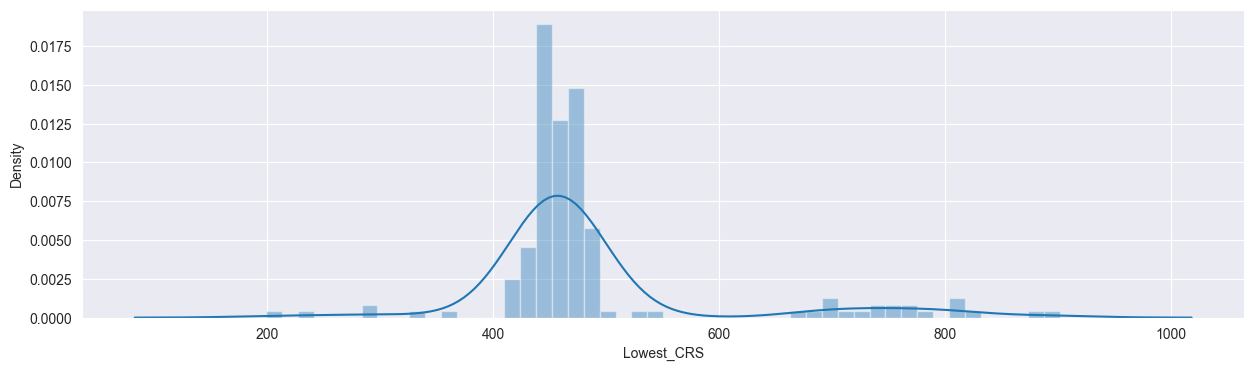

In [32]:
plt.figure(figsize=(15,4))
sns.distplot(df['Lowest_CRS'])

<AxesSubplot:xlabel='Invites', ylabel='Lowest_CRS'>

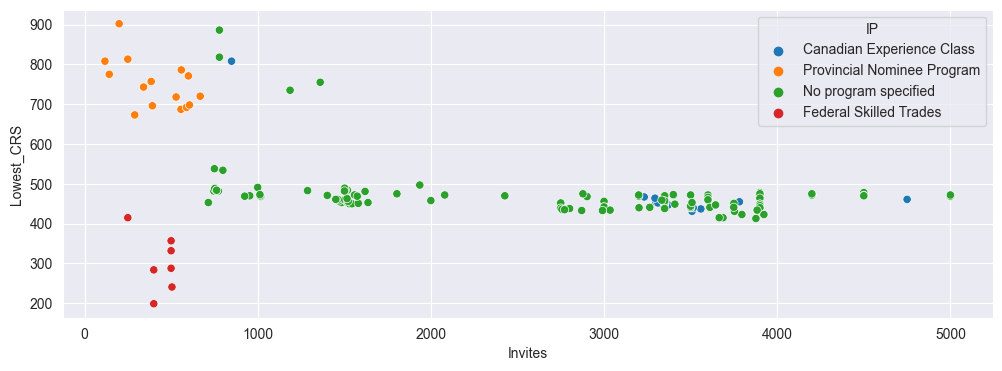

In [33]:
plt.figure(figsize=(12,4))
sns.scatterplot(x='Invites',y='Lowest_CRS',data=df, hue='IP')

<AxesSubplot:>

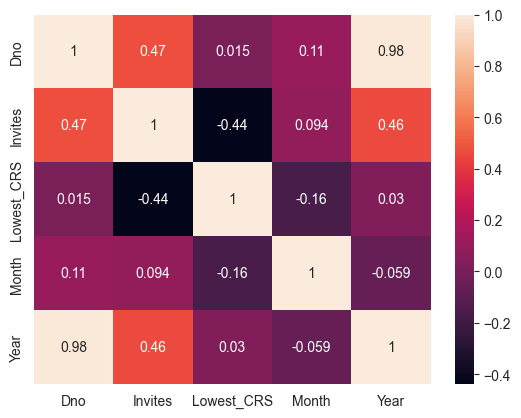

In [34]:
sns.heatmap(df.corr(), annot=True)

In [35]:
df.head(2)

,Dno,IP,Invites,Lowest_CRS,Month,Year
0,172,Canadian Experience Class,4750,461,1,2021
1,171,Provincial Nominee Program,250,813,1,2021


In [36]:
df = df.astype({"IP":'category'})
df['IP'] = df['IP'].cat.codes

In [37]:
X = df.drop('Invites',axis=1)
y = df['Invites']

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [39]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
print(X_train.shape)
print(X_test.shape)

(121, 5)
(52, 5)


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
model = Sequential()

model.add(Dense(500,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [43]:
earlystop = EarlyStopping(patience=100)

In [44]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          epochs=800, callbacks=[earlystop])

Epoch 1/800
4/4 [==============================] - 1s 57ms/step - loss: 8111323.0000 - val_loss: 8650273.0000
Epoch 2/800
4/4 [==============================] - 0s 17ms/step - loss: 8108362.0000 - val_loss: 8646068.0000
Epoch 3/800
4/4 [==============================] - 0s 16ms/step - loss: 8103225.0000 - val_loss: 8637174.0000
Epoch 4/800
4/4 [==============================] - 0s 15ms/step - loss: 8092712.0000 - val_loss: 8619508.0000
Epoch 5/800
4/4 [==============================] - 0s 14ms/step - loss: 8070586.0000 - val_loss: 8585991.0000
Epoch 6/800
4/4 [==============================] - 0s 18ms/step - loss: 8028252.5000 - val_loss: 8524471.0000
Epoch 7/800
4/4 [==============================] - 0s 16ms/step - loss: 7961130.5000 - val_loss: 8415596.0000
Epoch 8/800
4/4 [==============================] - 0s 17ms/step - loss: 7833647.0000 - val_loss: 8230523.0000
Epoch 9/800
4/4 [==============================] - 0s 21ms/step - loss: 7627765.0000 - val_loss: 7925767.0000
Epoch 10/8

Epoch 75/800
4/4 [==============================] - 0s 17ms/step - loss: 1467820.7500 - val_loss: 1391161.2500
Epoch 76/800
4/4 [==============================] - 0s 13ms/step - loss: 1592681.2500 - val_loss: 1394088.5000
Epoch 77/800
4/4 [==============================] - 0s 13ms/step - loss: 1579766.2500 - val_loss: 1433640.8750
Epoch 78/800
4/4 [==============================] - 0s 12ms/step - loss: 1424559.0000 - val_loss: 1458636.0000
Epoch 79/800
4/4 [==============================] - 0s 12ms/step - loss: 1496103.1250 - val_loss: 1455034.7500
Epoch 80/800
4/4 [==============================] - 0s 12ms/step - loss: 1587158.0000 - val_loss: 1432934.7500
Epoch 81/800
4/4 [==============================] - 0s 13ms/step - loss: 1340038.8750 - val_loss: 1404767.2500
Epoch 82/800
4/4 [==============================] - 0s 13ms/step - loss: 1622058.8750 - val_loss: 1398659.7500
Epoch 83/800
4/4 [==============================] - 0s 12ms/step - loss: 1587303.5000 - val_loss: 1393102.2500
E

4/4 [==============================] - 0s 13ms/step - loss: 1212835.7500 - val_loss: 1053018.5000
Epoch 149/800
4/4 [==============================] - 0s 13ms/step - loss: 1243095.5000 - val_loss: 1020157.0625
Epoch 150/800
4/4 [==============================] - 0s 13ms/step - loss: 1294317.7500 - val_loss: 1006607.6875
Epoch 151/800
4/4 [==============================] - 0s 13ms/step - loss: 1137661.6250 - val_loss: 985200.4375
Epoch 152/800
4/4 [==============================] - 0s 13ms/step - loss: 1313711.0000 - val_loss: 983761.9375
Epoch 153/800
4/4 [==============================] - 0s 12ms/step - loss: 1239161.5000 - val_loss: 1003226.6250
Epoch 154/800
4/4 [==============================] - 0s 13ms/step - loss: 1162094.5000 - val_loss: 984191.3750
Epoch 155/800
4/4 [==============================] - 0s 13ms/step - loss: 1128193.3750 - val_loss: 967732.3125
Epoch 156/800
4/4 [==============================] - 0s 14ms/step - loss: 1187903.0000 - val_loss: 975985.8750
Epoch 157/8

Epoch 222/800
4/4 [==============================] - 0s 14ms/step - loss: 932575.2500 - val_loss: 804656.1250
Epoch 223/800
4/4 [==============================] - 0s 13ms/step - loss: 1069481.3750 - val_loss: 783828.2500
Epoch 224/800
4/4 [==============================] - 0s 13ms/step - loss: 1136168.5000 - val_loss: 782353.3125
Epoch 225/800
4/4 [==============================] - 0s 13ms/step - loss: 1048930.8750 - val_loss: 794390.1250
Epoch 226/800
4/4 [==============================] - 0s 14ms/step - loss: 1089066.1250 - val_loss: 870375.4375
Epoch 227/800
4/4 [==============================] - 0s 13ms/step - loss: 981406.9375 - val_loss: 841519.2500
Epoch 228/800
4/4 [==============================] - 0s 13ms/step - loss: 1027304.9375 - val_loss: 795062.0000
Epoch 229/800
4/4 [==============================] - 0s 13ms/step - loss: 994858.4375 - val_loss: 781255.5625
Epoch 230/800
4/4 [==============================] - 0s 14ms/step - loss: 1075164.0000 - val_loss: 796860.5625
Epoc

4/4 [==============================] - 0s 13ms/step - loss: 890571.4375 - val_loss: 685886.6875
Epoch 297/800
4/4 [==============================] - 0s 14ms/step - loss: 806352.6250 - val_loss: 644033.0625
Epoch 298/800
4/4 [==============================] - 0s 13ms/step - loss: 964211.6250 - val_loss: 636820.4375
Epoch 299/800
4/4 [==============================] - 0s 13ms/step - loss: 945805.1875 - val_loss: 638032.3750
Epoch 300/800
4/4 [==============================] - 0s 14ms/step - loss: 729211.6250 - val_loss: 649690.1250
Epoch 301/800
4/4 [==============================] - 0s 13ms/step - loss: 805410.5000 - val_loss: 624669.6875
Epoch 302/800
4/4 [==============================] - 0s 14ms/step - loss: 1049708.8750 - val_loss: 630394.9375
Epoch 303/800
4/4 [==============================] - 0s 13ms/step - loss: 834123.6250 - val_loss: 633405.3125
Epoch 304/800
4/4 [==============================] - 0s 13ms/step - loss: 924717.8750 - val_loss: 619321.7500
Epoch 305/800
4/4 [====

4/4 [==============================] - 0s 13ms/step - loss: 612577.3750 - val_loss: 441249.0625
Epoch 371/800
4/4 [==============================] - 0s 13ms/step - loss: 509364.4375 - val_loss: 443865.5000
Epoch 372/800
4/4 [==============================] - 0s 13ms/step - loss: 719654.1250 - val_loss: 451169.8750
Epoch 373/800
4/4 [==============================] - 0s 13ms/step - loss: 707777.1875 - val_loss: 445204.8438
Epoch 374/800
4/4 [==============================] - 0s 13ms/step - loss: 569059.8750 - val_loss: 436286.0000
Epoch 375/800
4/4 [==============================] - 0s 13ms/step - loss: 645432.4375 - val_loss: 457475.0625
Epoch 376/800
4/4 [==============================] - 0s 14ms/step - loss: 811646.6250 - val_loss: 459178.0625
Epoch 377/800
4/4 [==============================] - 0s 13ms/step - loss: 524783.8750 - val_loss: 447239.6250
Epoch 378/800
4/4 [==============================] - 0s 12ms/step - loss: 569690.0625 - val_loss: 436107.5312
Epoch 379/800
4/4 [=====

4/4 [==============================] - 0s 13ms/step - loss: 483251.2500 - val_loss: 314939.0000
Epoch 445/800
4/4 [==============================] - 0s 13ms/step - loss: 435061.8125 - val_loss: 325596.5312
Epoch 446/800
4/4 [==============================] - 0s 12ms/step - loss: 456353.8750 - val_loss: 304405.5000
Epoch 447/800
4/4 [==============================] - 0s 14ms/step - loss: 592169.9375 - val_loss: 304454.7188
Epoch 448/800
4/4 [==============================] - 0s 13ms/step - loss: 398239.1875 - val_loss: 331342.0000
Epoch 449/800
4/4 [==============================] - 0s 12ms/step - loss: 452069.6250 - val_loss: 312506.6875
Epoch 450/800
4/4 [==============================] - 0s 13ms/step - loss: 400743.3438 - val_loss: 291776.9375
Epoch 451/800
4/4 [==============================] - 0s 13ms/step - loss: 398733.8125 - val_loss: 284371.1562
Epoch 452/800
4/4 [==============================] - 0s 13ms/step - loss: 388034.5938 - val_loss: 295898.0000
Epoch 453/800
4/4 [=====

4/4 [==============================] - 0s 13ms/step - loss: 334943.6562 - val_loss: 240074.8125
Epoch 519/800
4/4 [==============================] - 0s 13ms/step - loss: 374406.9688 - val_loss: 244152.9062
Epoch 520/800
4/4 [==============================] - 0s 14ms/step - loss: 354778.6562 - val_loss: 252387.5781
Epoch 521/800
4/4 [==============================] - 0s 13ms/step - loss: 363387.1875 - val_loss: 326330.5625
Epoch 522/800
4/4 [==============================] - 0s 13ms/step - loss: 459084.0625 - val_loss: 244011.0781
Epoch 523/800
4/4 [==============================] - 0s 13ms/step - loss: 325400.8125 - val_loss: 245734.3125
Epoch 524/800
4/4 [==============================] - 0s 13ms/step - loss: 376815.2188 - val_loss: 271755.3125
Epoch 525/800
4/4 [==============================] - 0s 13ms/step - loss: 327429.8750 - val_loss: 286586.4688
Epoch 526/800
4/4 [==============================] - 0s 13ms/step - loss: 331696.0938 - val_loss: 232686.0000
Epoch 527/800
4/4 [=====

4/4 [==============================] - 0s 13ms/step - loss: 239263.1406 - val_loss: 190705.3906
Epoch 593/800
4/4 [==============================] - 0s 13ms/step - loss: 320508.0312 - val_loss: 224626.8906
Epoch 594/800
4/4 [==============================] - 0s 13ms/step - loss: 302869.9688 - val_loss: 207712.0781
Epoch 595/800
4/4 [==============================] - 0s 13ms/step - loss: 411510.9062 - val_loss: 179180.0781
Epoch 596/800
4/4 [==============================] - 0s 13ms/step - loss: 344048.0625 - val_loss: 179010.0938
Epoch 597/800
4/4 [==============================] - 0s 13ms/step - loss: 340559.5625 - val_loss: 191833.3594
Epoch 598/800
4/4 [==============================] - 0s 13ms/step - loss: 319985.7812 - val_loss: 197101.5781
Epoch 599/800
4/4 [==============================] - 0s 12ms/step - loss: 392478.8438 - val_loss: 197396.2500
Epoch 600/800
4/4 [==============================] - 0s 14ms/step - loss: 211827.0312 - val_loss: 192963.1094
Epoch 601/800
4/4 [=====

4/4 [==============================] - 0s 13ms/step - loss: 256129.0938 - val_loss: 168149.8906
Epoch 667/800
4/4 [==============================] - 0s 13ms/step - loss: 298662.1562 - val_loss: 166430.7656
Epoch 668/800
4/4 [==============================] - 0s 13ms/step - loss: 199919.4844 - val_loss: 162400.7500
Epoch 669/800
4/4 [==============================] - 0s 13ms/step - loss: 363728.5625 - val_loss: 176989.8906
Epoch 670/800
4/4 [==============================] - 0s 13ms/step - loss: 310978.3438 - val_loss: 162577.0312
Epoch 671/800
4/4 [==============================] - 0s 13ms/step - loss: 239271.2188 - val_loss: 162028.2656
Epoch 672/800
4/4 [==============================] - 0s 13ms/step - loss: 303622.8750 - val_loss: 182465.0312
Epoch 673/800
4/4 [==============================] - 0s 14ms/step - loss: 217081.3906 - val_loss: 178562.8438
Epoch 674/800
4/4 [==============================] - 0s 14ms/step - loss: 296276.2188 - val_loss: 158706.8125
Epoch 675/800
4/4 [=====

4/4 [==============================] - 0s 14ms/step - loss: 308876.5625 - val_loss: 179146.5625
Epoch 741/800
4/4 [==============================] - 0s 14ms/step - loss: 283872.8125 - val_loss: 169768.0000
Epoch 742/800
4/4 [==============================] - 0s 12ms/step - loss: 282220.4688 - val_loss: 186785.9219
Epoch 743/800
4/4 [==============================] - 0s 13ms/step - loss: 268861.6250 - val_loss: 210347.7812
Epoch 744/800
4/4 [==============================] - 0s 13ms/step - loss: 251254.2812 - val_loss: 153359.9531
Epoch 745/800
4/4 [==============================] - 0s 13ms/step - loss: 251506.1875 - val_loss: 165498.9688
Epoch 746/800
4/4 [==============================] - 0s 13ms/step - loss: 319078.8750 - val_loss: 157849.0312
Epoch 747/800
4/4 [==============================] - 0s 13ms/step - loss: 248568.9688 - val_loss: 172353.5000
Epoch 748/800
4/4 [==============================] - 0s 13ms/step - loss: 258539.0156 - val_loss: 177822.5000
Epoch 749/800
4/4 [=====

In [45]:
loss_df = pd.DataFrame(model.history.history)

In [46]:
loss_df = pd.DataFrame(model.history.history, columns=['loss', 'val_loss'])
loss_df.head(2)

,loss,val_loss
0,8111323.0,8650273.0
1,8108362.0,8646068.0


In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [48]:
predictions = model.predict(X_test)

2/2 [==============================] - 0s 16ms/step


In [49]:
mean_absolute_error(y_test,predictions)

295.29603165846606

In [50]:
np.sqrt(mean_squared_error(y_test,predictions))

370.57264470477713

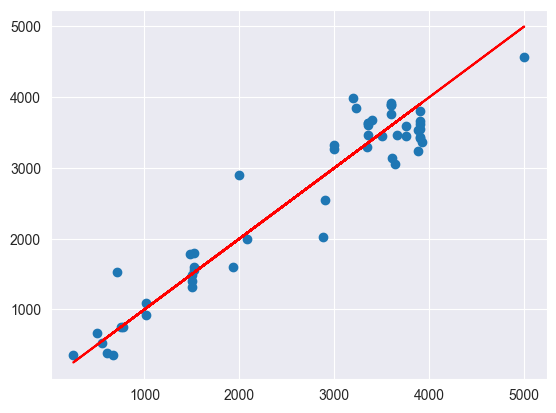

In [51]:
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [52]:
X_test.shape

(52, 5)

<AxesSubplot:ylabel='Density'>

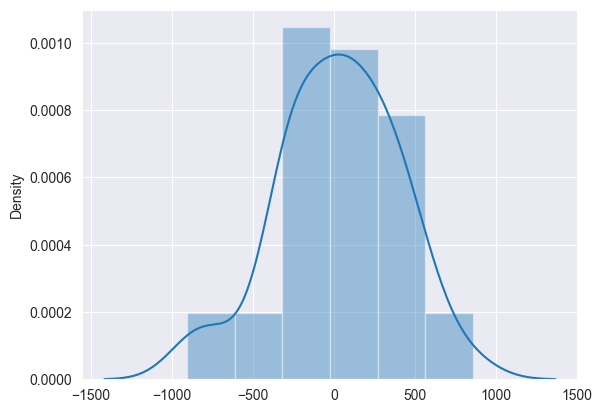

In [53]:
errors = y_test.values.reshape(52, 1) - predictions
sns.distplot(errors)

### Predicting on a brand new data

In [54]:
df.head(2)

,Dno,IP,Invites,Lowest_CRS,Month,Year
0,172,0,4750,461,1,2021
1,171,3,250,813,1,2021


In [55]:
new_df = pd.DataFrame({'Dno':[172],'IP':[0],'Lowest_CRS':461, 'Month':1, 'Year':2021 })
#new_df = df.drop('Lowest_CRS',axis=1).iloc[0]

In [56]:
new_df = scaler.transform(new_df.values.reshape(-1, 5))

In [57]:
new_df

array([[1.        , 0.        , 0.37268848, 0.        , 1.        ]])

In [58]:
model.predict(new_df)

1/1 [==============================] - 0s 15ms/step


array([[4802.2847]], dtype=float32)

In [59]:
pred_df = pd.DataFrame(predictions, columns=['Predictions'])
pred_df['Actual'] = y_test.values

<AxesSubplot:>

<Figure size 640x480 with 0 Axes>

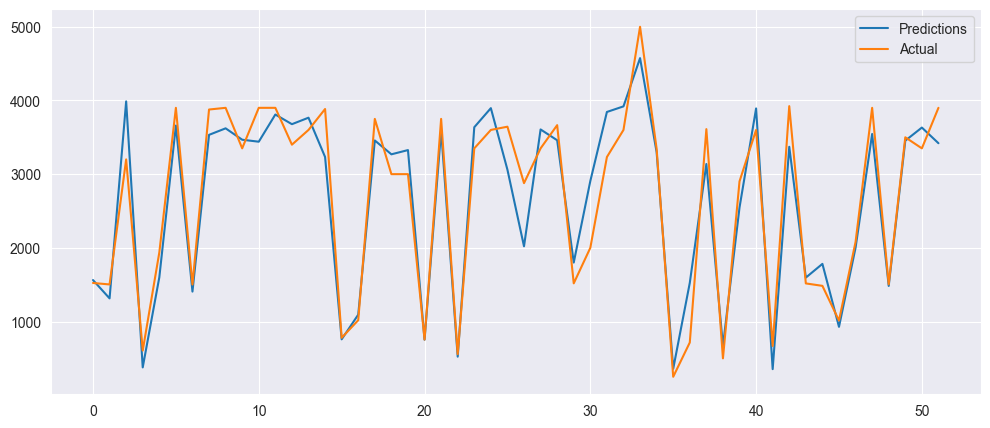

In [60]:
plt.figure()
pred_df.plot(figsize=(12,5))

In [65]:
model.save_weights('CEC.h5')

In [66]:
model.save('full_model_ECE.h5')

In [63]:
'Sja'

'Sja'

In [64]:
pwd

'D:\\Learnings\\AdvancedMlDl\\Projects\\Weather Forecast'